### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [2]:
df = pd.read_csv('data/training_data.csv')

In [3]:
categorical_features = ['company','country','director','genre','rating','released','star','year',
                        'writer','original_title','overview','tagline','title','genres_edited',
                        'spoken_languages_edited','production_countries_edited','keywords_edited']
continuous_features = ['budget']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [4]:
df['company']=df['company'].astype('category').cat.codes
df['country']=df['country'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
df['genre']=df['genre'].astype('category').cat.codes
df['rating']=df['rating'].astype('category').cat.codes
df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [5]:
corr_df=df[all_features].corr()

In [6]:
corr_df

,company,country,director,genre,rating,star,year,writer,budget,budget_norm,isprofit,profitability_ratio
company,1.000000,-0.018988,-0.002143,-0.068701,-0.089521,0.014552,-0.034148,0.012122,0.093210,0.093210,0.022075,0.019643
country,-0.018988,1.000000,0.020542,0.010382,0.039951,-0.040811,-0.068261,-0.022174,0.054282,0.054282,0.133633,0.160308
director,-0.002143,0.020542,1.000000,0.057923,0.005559,0.052108,-0.021255,0.123626,0.013100,0.013100,-0.008111,0.019033
genre,-0.068701,0.010382,0.057923,1.000000,0.138338,0.013363,0.023467,0.001068,-0.265642,-0.265642,0.035425,0.050215
rating,-0.089521,0.039951,0.005559,0.138338,1.000000,0.009466,-0.028505,-0.010330,-0.162405,-0.162405,-0.054051,-0.065260
star,0.014552,-0.040811,0.052108,0.013363,0.009466,1.000000,-0.009248,-0.001103,0.027285,0.027285,-0.015164,-0.014705
year,-0.034148,-0.068261,-0.021255,0.023467,-0.028505,-0.009248,1.000000,-0.025103,0.233639,0.233639,-0.051374,-0.119996
writer,0.012122,-0.022174,0.123626,0.001068,-0.010330,-0.001103,-0.025103,1.000000,-0.035363,-0.035363,-0.001623,0.030200
budget,0.093210,0.054282,0.013100,-0.265642,-0.162405,0.027285,0.233639,-0.035363,1.000000,1.000000,-0.062756,-0.138796
budget_norm,0.093210,0.054282,0.013100,-0.265642,-0.162405,0.027285,0.233639,-0.035363,1.000000,1.000000,-0.062756,-0.138796


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

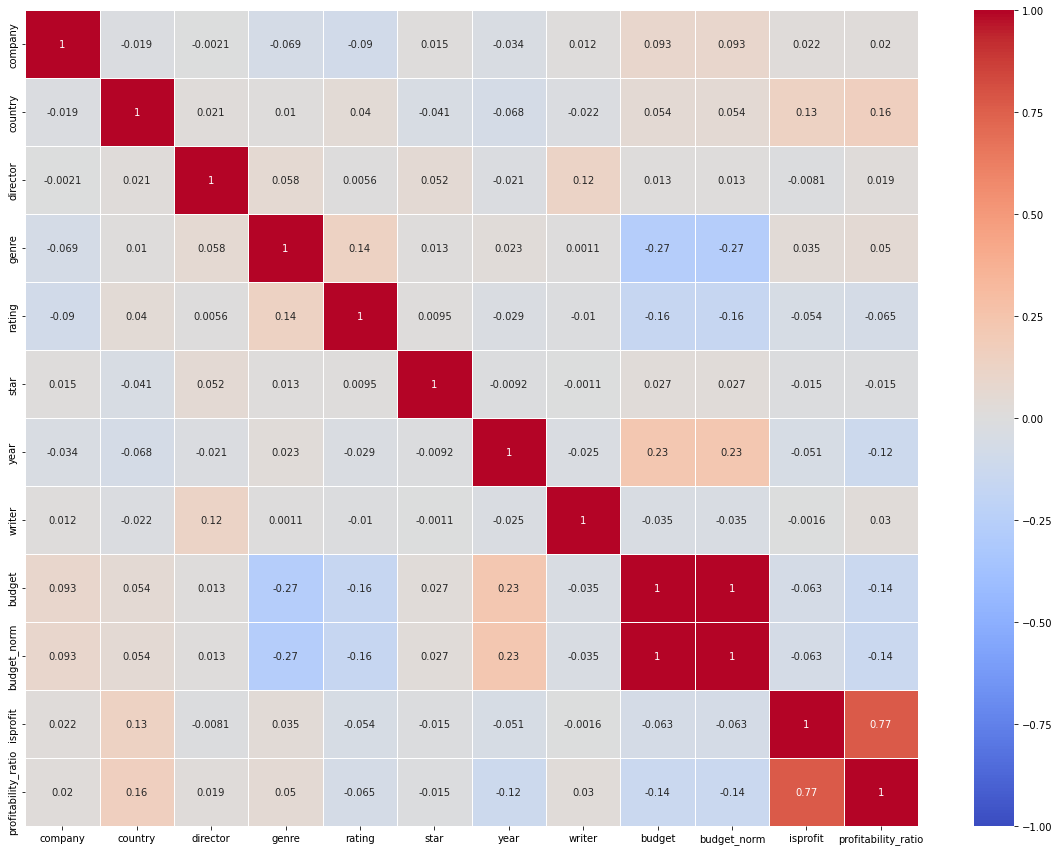

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [8]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,10]<-0.04 or corr_df.iloc[i,10]>0.04 or \
        corr_df.iloc[i,11]<-0.04 or corr_df.iloc[i,10]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [9]:
corr_df_features

{'budget', 'budget_norm', 'country', 'rating', 'year'}

In [10]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')